In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# 数据导入，数据理解和业务理解 Data Loading, Data Understanding & Business Understanding

In [2]:
os.getcwd() # 设定工作文件夹
os.chdir('/Users/TH/Desktop/DataWhale/NLP/data')

In [3]:
os.listdir()

['.DS_Store', 'test_a.csv', 'train_set.csv']

In [4]:
train_df = pd.read_csv('train_set.csv', sep='\t', nrows=100) #数据导入
#train_df = pd.read_csv('train_set.csv', sep='\t')

### 基础数据理解

In [5]:
train_df.shape

(100, 2)

In [6]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [7]:
train_df.label.unique()

array([ 2, 11,  3,  9, 10, 12,  0,  7,  4,  1,  6,  5,  8, 13])

在数据集中标签的对应的关系如下：

{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10,

'时尚': 11, '彩票': 12, '星座': 13}

#### 评价标准为类别f1_score的均值，选手提交结果与实际测试集的类别进行对比，结果越大越好。

解题思路

赛题思路分析：赛题本质是一个文本分类问题，需要根据每句的字符进行分类。但赛题给出的数据是匿名化的，不能直接使用中文分词等操作，这个是赛题的难点。

因此本次赛题的难点是需要对匿名字符进行建模，进而完成文本分类的过程。由于文本数据是一种典型的非结构化数据，因此可能涉及到特征提取和分类模型两个部分。为了减低参赛难度，我们提供了一些解题思路供大家参考：

思路1：TF-IDF + 机器学习分类器
直接使用TF-IDF对文本提取特征，并使用分类器进行分类。在分类器的选择上，可以使用SVM、LR、或者XGBoost。

思路2：FastText
FastText是入门款的词向量，利用Facebook提供的FastText工具，可以快速构建出分类器。

思路3：WordVec + 深度学习分类器
WordVec是进阶款的词向量，并通过构建深度学习分类完成分类。深度学习分类的网络结构可以选择TextCNN、TextRNN或者BiLSTM。

思路4：Bert词向量
Bert是高配款的词向量，具有强大的建模学习能力。

## 数据句长分析

In [8]:
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))

In [9]:
train_df['text_len'].describe()

count     100.000000
mean      872.320000
std       923.138191
min        64.000000
25%       359.500000
50%       598.000000
75%      1058.000000
max      7125.000000
Name: text_len, dtype: float64

In [10]:
sum(train_df['text_len'] > 7000) / sum(train_df['text_len'])

1.1463683052090976e-05

Text(0.5, 1.0, 'Histogram of char count')

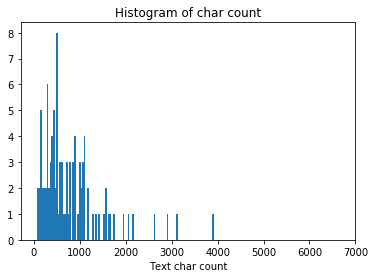

In [11]:
plt.hist(train_df['text_len'],bins=200)
plt.xlim(xmax=7000)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

### 新闻类别分布

Text(0.5, 0, 'category')

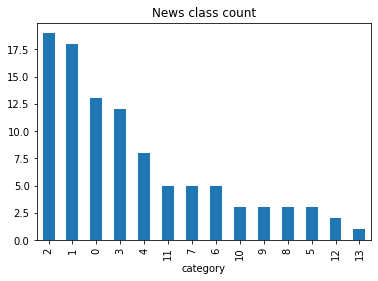

In [12]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

### 字符分布统计

In [17]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
# print (word_count.items())
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True) # Key is the attribute for sorting

print(len(word_count))

print(word_count[0])

print(word_count[-1])

2405
('3750', 3702)
('5034', 1)


In [36]:
from collections import Counter
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])

print(word_count[1])



    


('900', 99)
('3750', 99)


In [45]:
# 前100条中频数>90的字符
for i in range(0, len(word_count)):
    if int(word_count[i][1]) > 90:
        print (word_count[i])

('900', 99)
('3750', 99)
('648', 96)


In [44]:
print("字符总量：",len(all_lines),"设计字符数总量：", len(word_count))

字符总量： 129327 设计字符数总量： 2405


## 本章作业

1.假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？

2.统计每类新闻中出现次数对多的字符

In [46]:
train_df.columns

Index(['label', 'text', 'text_len', 'text_unique'], dtype='object')

In [49]:
train_df['text_list'] = train_df['text'].apply(lambda x: x.split(' '))

In [52]:
'3750' in train_df['text_list'][0]

True